# Detecting Parkinson's Disease
## Xiaodan Chen 
## 2021-10-20

# Introduction:

In this Python Machine learning project, using the Python libraries XGBoost (eXtreme Gradient Boosting), scikit-learn, numpy, and pandas, I will build a model using an XGBClassifier as well as various factors to detect the presence of Parkinson's Disease. I will prepare the data, get the features and labels, scale the features, split the dataset, build an XGBClassifier, and predict values for test data and calculate the accuracy of the model.

### Importing the Essential Packages

In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Reading Data

In [9]:
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Checking for Missing Values

This dataset does not contain any missing value.

In [26]:
df.isnull().values.any()

False

### Data Structure

This data contains 195 observations and 24 columns.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Preparing Data

Get the features and labels from the dataset. The features are all the columns except 'status', and the labels are those in the 'status' column. 

#### Labels and Features

In [10]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

The 'status' column has values 0 and 1 as labels. Count the numbers of the labels for 0 and 1.
We have 147 ones and 48 zeros in the 'status' column.  

In [11]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


#### Data Normalization

Scale the features to value between -1 and 1. 

In [15]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

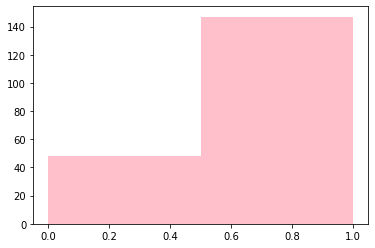

In [25]:
plt.hist(y, bins =2, color = 'pink')
plt.show()

#### Spliting Data

Split the dataset into training and testing sets with 20% of the data for testing. 

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

### Training Model

Initialize an XGBClassifier(eXtreme Gradient Boosting) and train the model. 

In [28]:
import warnings
warnings.filterwarnings('ignore')

model=XGBClassifier()
model.fit(x_train,y_train)

[21:41:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

### Predicting and Evaluating

Predict values for x_test and calculate the accuracy 94.87% for the model.

In [20]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486
